# Hierarchical Clustering

#### University dataset

In [28]:
# For reading data set
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import scale
import sklearn as sl

In [29]:
# importing the dataset
Univ = pd.read_csv(r"C:\Users\HOME\Desktop\github\Clustering-master/Universities.csv")

In [35]:
import matplotlib.pyplot as plt
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


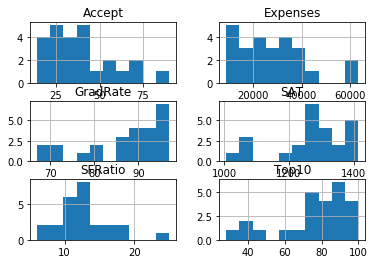

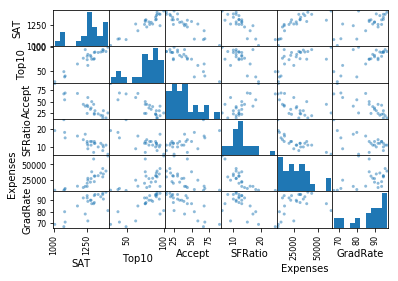

In [32]:
Univ.hist()
plt.show()
from pandas.plotting import scatter_matrix
scatter_matrix(Univ)
plt.show()


In [36]:
print(Univ.groupby('SFRatio').size())

SFRatio
6     1
7     1
8     1
9     1
10    2
11    4
12    4
13    4
14    1
15    1
16    1
17    1
18    1
19    1
25    1
dtype: int64


In [5]:
Univ.shape
type(Univ)
Univ.size

175

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm1 = scale(Univ.iloc[:,1:])
type(df_norm1)

numpy.ndarray

In [7]:
df_norm1

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [8]:
df_norm1 = pd.DataFrame(df_norm1)
type(df_norm1)

pandas.core.frame.DataFrame

In [9]:
df_norm1.head()

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [10]:
# importing the library
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram

In [11]:
#p = np.array(df_norm) # converting into numpy array format 
#help(linkage)
z = linkage(df_norm1, method="complete",metric="euclidean")
z1 = linkage(df_norm1, method="single",metric="euclidean")


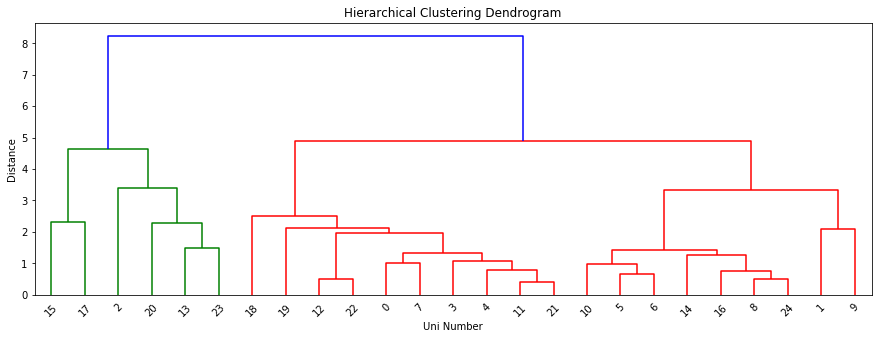

In [27]:
# dendrogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Uni Number')
plt.ylabel('Distance')
#sch.dendrogram(z1)
sch.dendrogram(z)
plt.show()

In [13]:
#help(linkage)

In [14]:
# Now applying Agglomerative Clustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering

In [15]:
#df_norm

In [16]:
# clustering using complete linkage & euclidean distance
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity = "euclidean").fit(df_norm1)
h_complete.labels_

array([2, 0, 4, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 3, 2,
       2, 3, 0], dtype=int64)

In [17]:
cluster_no = pd.DataFrame(h_complete.labels_)
(cluster_no)


,0
0,2
1,0
2,4
3,2
4,2
5,0
6,0
7,2
8,0
9,0


In [18]:
Univ['cluster'] = cluster_no # creating a  new column and assigning it to new column
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [19]:

Univ1 = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,0,CalTech,1415,100,25,6,63575,81
2,4,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [20]:
# view top 5 records in the dataset
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [21]:
Univ1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,0,CalTech,1415,100,25,6,63575,81
2,4,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [22]:
# getting aggregate mean of each cluster
Univ1.iloc[:,2:].groupby(Univ1.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1040.000000,38.500000,78.500000,22.000000,8885.000000,68.000000
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000
3,1115.333333,47.666667,63.666667,16.333333,12504.000000,78.666667
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [23]:
# creating a csv file 
Univ1.to_csv("Feb09.csv")

In [24]:
pwd

'C:\\Users\\HOME\\Desktop\\github\\Clustering-master'